In [1]:
import torch

In [2]:
from sbi import utils as utils

In [3]:
from sbi import analysis as analysis

In [4]:
from sbi.inference.base import infer

In [13]:
num_dim = 3
prior = utils.BoxUniform(low=-2 * torch.ones(num_dim), high=2 * torch.ones(num_dim))

def simulator(parameter_set):
    return 1.0 + parameter_set + torch.randn(parameter_set.shape) * 0.1

In [14]:
posterior = infer(simulator, prior, method="SNPE", num_simulations=1000)

Running 1000 simulations.:   0%|          | 0/1000 [00:00<?, ?it/s]

 Neural network successfully converged after 59 epochs.

In [15]:
observation = torch.zeros(3)

In [18]:
simulator(torch.tensor([1.0, 0.0, 1.0]))

tensor([2.1402, 1.0266, 1.9995])

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

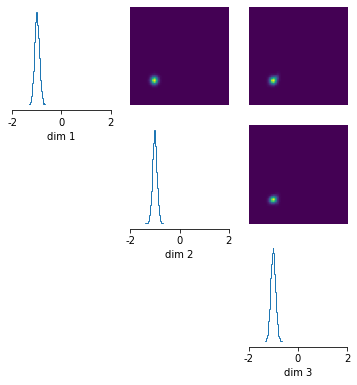

In [10]:
samples = posterior.sample((10000,), x=observation)
log_probability = posterior.log_prob(samples, x=observation)
_ = analysis.pairplot(samples, limits=[[-2, 2], [-2, 2], [-2, 2]], figsize=(6, 6))

In [ ]:
from limpy.plotsettings import *
plt.figure(figsize=[7,7], dpi=100)

num_plots = 8
colormap = plt.cm.gist_ncar
plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.inferno(np.linspace(0, 1, num_plots))))


for i in range(len(h_array)):
    plt.plot(bins_end1[i][:-1], hist_array1[i],linestyle='--', lw=2, label = r"$\Omega_{\rm cdm}=%.2f$" %(om_array[i]))
    
plt.legend(loc=0)

plt.ylabel("PDF")
plt.xlabel("Density")